In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

583

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3d093bb1d47c28804b072322524f571b


In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | itacare
Processing Record 2 of Set 1 | hilo
Processing Record 3 of Set 1 | narasannapeta
Processing Record 4 of Set 1 | narsaq
Processing Record 5 of Set 1 | tuktoyaktuk
Processing Record 6 of Set 1 | mar del plata
Processing Record 7 of Set 1 | puerto ayora
Processing Record 8 of Set 1 | nikolskoye
Processing Record 9 of Set 1 | dikson
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | upernavik
Processing Record 12 of Set 1 | caravelas
Processing Record 13 of Set 1 | jamestown
Processing Record 14 of Set 1 | vaini
Processing Record 15 of Set 1 | kapaa
Processing Record 16 of Set 1 | saldanha
Processing Record 17 of Set 1 | butaritari
Processing Record 18 of Set 1 | mataura
Processing Record 19 of Set 1 | arraial do cabo
Processing Record 20 of Set 1 | avarua
Processing Record 21 of Set 1 | pochutla
Processing Record 22 of Set 1 | thompson
Processing Record 23 of Set 1 

Processing Record 38 of Set 4 | bengkulu
Processing Record 39 of Set 4 | erenhot
Processing Record 40 of Set 4 | sao filipe
Processing Record 41 of Set 4 | birjand
Processing Record 42 of Set 4 | melfi
Processing Record 43 of Set 4 | wahran
City not found. Skipping...
Processing Record 44 of Set 4 | krasnoarmeysk
Processing Record 45 of Set 4 | coahuayana
Processing Record 46 of Set 4 | mayskiy
Processing Record 47 of Set 4 | kaitangata
Processing Record 48 of Set 4 | ziro
Processing Record 49 of Set 4 | torbay
Processing Record 50 of Set 4 | tautira
Processing Record 1 of Set 5 | athabasca
Processing Record 2 of Set 5 | belushya guba
City not found. Skipping...
Processing Record 3 of Set 5 | praia da vitoria
Processing Record 4 of Set 5 | matay
Processing Record 5 of Set 5 | acarau
Processing Record 6 of Set 5 | san patricio
Processing Record 7 of Set 5 | hasaki
Processing Record 8 of Set 5 | nanortalik
Processing Record 9 of Set 5 | hualmay
Processing Record 10 of Set 5 | ngunguru
Pr

Processing Record 28 of Set 8 | alugan
Processing Record 29 of Set 8 | inuvik
Processing Record 30 of Set 8 | belmonte
Processing Record 31 of Set 8 | laytown
Processing Record 32 of Set 8 | eureka
Processing Record 33 of Set 8 | bandarbeyla
Processing Record 34 of Set 8 | skjervoy
Processing Record 35 of Set 8 | jizan
Processing Record 36 of Set 8 | ginir
Processing Record 37 of Set 8 | chimoio
Processing Record 38 of Set 8 | tessalit
Processing Record 39 of Set 8 | beni
Processing Record 40 of Set 8 | ambon
Processing Record 41 of Set 8 | hihifo
City not found. Skipping...
Processing Record 42 of Set 8 | mayo
Processing Record 43 of Set 8 | hobyo
Processing Record 44 of Set 8 | asayita
City not found. Skipping...
Processing Record 45 of Set 8 | petropavlovsk-kamchatskiy
Processing Record 46 of Set 8 | antofagasta
Processing Record 47 of Set 8 | znamenskoye
Processing Record 48 of Set 8 | victoria point
Processing Record 49 of Set 8 | longlac
City not found. Skipping...
Processing Rec

Processing Record 14 of Set 12 | xinzhou
Processing Record 15 of Set 12 | nicholasville
Processing Record 16 of Set 12 | zlitan
Processing Record 17 of Set 12 | cabanas
Processing Record 18 of Set 12 | talcahuano
Processing Record 19 of Set 12 | werda
Processing Record 20 of Set 12 | nuuk
Processing Record 21 of Set 12 | wonthaggi
Processing Record 22 of Set 12 | lemesos
City not found. Skipping...
Processing Record 23 of Set 12 | nidzica
Processing Record 24 of Set 12 | san antonio
Processing Record 25 of Set 12 | xiaoweizhai
Processing Record 26 of Set 12 | awbari
Processing Record 27 of Set 12 | monaragala
Processing Record 28 of Set 12 | north platte
Processing Record 29 of Set 12 | asfi
Processing Record 30 of Set 12 | avera
Processing Record 31 of Set 12 | biskupiec
Processing Record 32 of Set 12 | kochubey
Processing Record 33 of Set 12 | haines junction
-----------------------------
Data Retrieval Complete      
-----------------------------


In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Itacare,-14.2775,-38.9967,71.69,79,33,8.93,BR,2022-07-18 23:46:22
1,Hilo,19.7297,-155.0900,91.27,73,75,9.22,US,2022-07-18 23:46:22
2,Narasannapeta,18.4167,84.0500,78.84,88,83,4.00,IN,2022-07-18 23:45:00
3,Narsaq,60.9167,-46.0500,57.42,73,98,0.69,GL,2022-07-18 23:46:23
4,Tuktoyaktuk,69.4541,-133.0374,66.20,82,100,10.36,CA,2022-07-18 23:46:23
5,Mar Del Plata,-38.0023,-57.5575,45.95,81,0,5.75,AR,2022-07-18 23:46:24
6,Puerto Ayora,-0.7393,-90.3518,68.56,95,88,5.99,EC,2022-07-18 23:46:24
7,Nikolskoye,59.7035,30.7861,54.81,93,56,4.65,RU,2022-07-18 23:45:29
8,Dikson,73.5069,80.5464,45.14,79,69,12.37,RU,2022-07-18 23:46:25
9,Punta Arenas,-53.1500,-70.9167,39.31,87,75,31.07,CL,2022-07-18 23:45:19


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed" ]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Itacare,BR,2022-07-18 23:46:22,-14.2775,-38.9967,71.69,79,33,8.93
1,Hilo,US,2022-07-18 23:46:22,19.7297,-155.0900,91.27,73,75,9.22
2,Narasannapeta,IN,2022-07-18 23:45:00,18.4167,84.0500,78.84,88,83,4.00
3,Narsaq,GL,2022-07-18 23:46:23,60.9167,-46.0500,57.42,73,98,0.69
4,Tuktoyaktuk,CA,2022-07-18 23:46:23,69.4541,-133.0374,66.20,82,100,10.36
5,Mar Del Plata,AR,2022-07-18 23:46:24,-38.0023,-57.5575,45.95,81,0,5.75
6,Puerto Ayora,EC,2022-07-18 23:46:24,-0.7393,-90.3518,68.56,95,88,5.99
7,Nikolskoye,RU,2022-07-18 23:45:29,59.7035,30.7861,54.81,93,56,4.65
8,Dikson,RU,2022-07-18 23:46:25,73.5069,80.5464,45.14,79,69,12.37
9,Punta Arenas,CL,2022-07-18 23:45:19,-53.1500,-70.9167,39.31,87,75,31.07


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [16]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1658189001.8568678

In [17]:
#Get today's date in seconds
today = time.time()
today

1658189040.0938888

In [18]:
today = time.strftime("%x")
today

'07/18/22'

In [20]:
# Import time module
import time

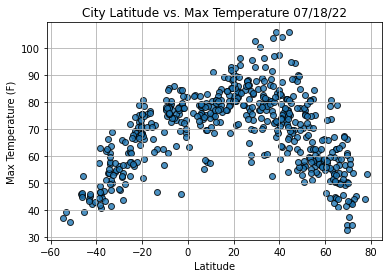

In [19]:


# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

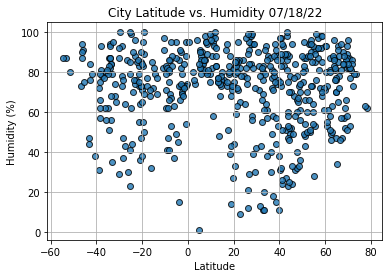

In [23]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

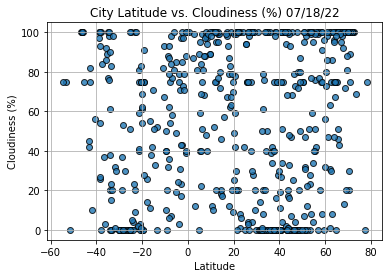

In [24]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

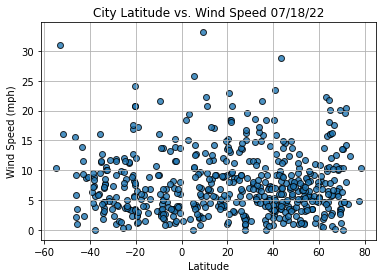

In [25]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()